# KNN Imputer

Imputating is the process of replacing missing data with substitute values. 

KNN Imputer imputes missing values with the mean value from nearest neighbors.

Data Set - https://www.kaggle.com/nehalalex/bangalore-house-price

## Table of Content

1. **[Header Files](#lib)**
2. **[About Data Set](#about)**
3. **[Data Preparation](#prep)**
    - 3.1 - **[Read Data](#read)**
    - 3.2 - **[Analysing Missing Values](#miss)**
    
        - 3.2.1 - **[KNN IMPUTER](#knn)**
4. **[Analysing a KNN imputed column](#analyze)**
5. **[Comparing KNN Imputer with traditional mean, median and mode imputations](#comp)**

<a id="lib"></a>
## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer

plt.rcParams['figure.figsize']=[12,8]

<a id="about"></a>
## 2. About the Dataset
##### AREA_TYPE : The type of the area where the property is located
##### AVAILABILITY : Whether the property is available currently or not
##### LOCATION : Location where the property is situtated
##### SIZE : Number of Bedrooms
##### SOCIETY : The type of society where the property is located
##### TOTAL_SQFT : Total Square feet of the property
##### BATH : Number of Bathrooms
##### BALCONY : Number of Balconies
##### PRICE : Price of the property in Lakhs

<a id="prep"></a>
## 3. Data Preperation

<a id="read"></a>
## 3.1 Read Data

In [3]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00


In [4]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13312,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.0
13313,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600.0,5.0,NaN,400.0
13314,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.0
13315,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.0
13316,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550.0,1.0,1.0,17.0


In [5]:
# Creating a copy of the data
data=df.copy()


## 3.2 Analysing Missing Values

In [6]:
df.isnull().sum()

area_type         30
availability      30
location          31
size              46
society         5510
total_sqft        30
bath             103
balcony          638
price             30
dtype: int64

## Categorical Variables

In [7]:
#40% of the data is missing so droping the column
df.drop('society',axis=1,inplace=True)

In [8]:
df.location.replace(to_replace=np.NaN,value=df.location.mode()[0],inplace=True)
df.area_type.replace(to_replace=np.NaN,value=df.area_type.mode()[0],inplace=True)

In [9]:
df['size']=df['size'].str.split(' ',expand=True)[0].astype(np.number)
df.bath=df.bath.astype(np.number)

In [10]:
df.availability=(df.availability=='Ready To Move')
df.availability.replace({True:1,False:0},inplace=True)
df.availability=df.availability.astype(object)
df.availability.head()

0    0
1    1
2    1
3    1
4    1
Name: availability, dtype: object

In [11]:
df.isnull().sum() 

area_type         0
availability      0
location          0
size             46
total_sqft       30
bath            103
balcony         638
price            30
dtype: int64

## Numerical Variables

In [12]:
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(np.number)


In [13]:
df.isnull().sum()

area_type         0
availability      0
location          0
size             46
total_sqft       30
bath            103
balcony         638
price            30
dtype: int64

<a id="knn"></a>
## 3.2.1 KNN Imputer

In [14]:
imputer = KNNImputer()

# fit on the dataset
imputer.fit(df_num)

# transform the dataset
df_num_impute = pd.DataFrame(imputer.transform(df_num),columns=df_num.columns)

In [15]:
df=pd.concat([df_cat,df_num_impute],axis=1)

In [16]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [18]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [ ]:
analyze

<a id="analyze"></a>

## 4.Analysing a KNN imputed column

Size , bath and balcony even tough numerical logicaly take only whole numbers as values(Eg:There is no such thing as 2.3 balconies ). But KNN imputer replaces nan's with decimal values as well so an additional level processing will come in handy if u want to avoid this problem.  

### Values in balcony before handling missing values

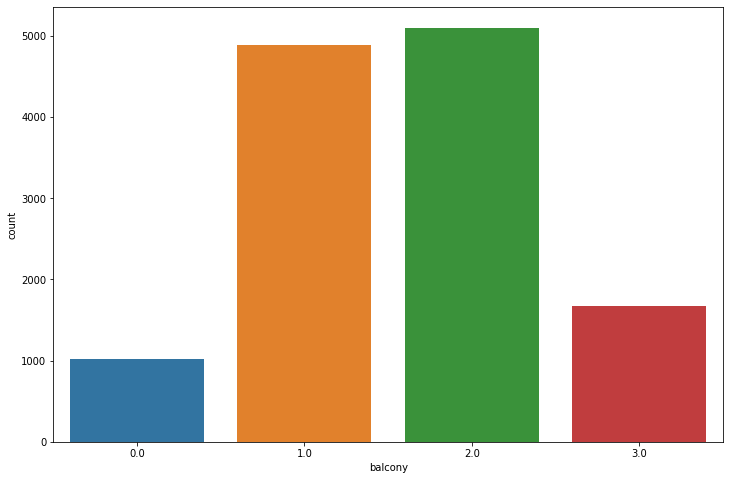

In [19]:
sns.countplot(x=data['balcony'])
plt.show()

In [20]:
data['balcony'].value_counts()

2.0    5103
1.0    4886
3.0    1669
0.0    1021
Name: balcony, dtype: int64

### Values in balcony after applying KNN Imputer

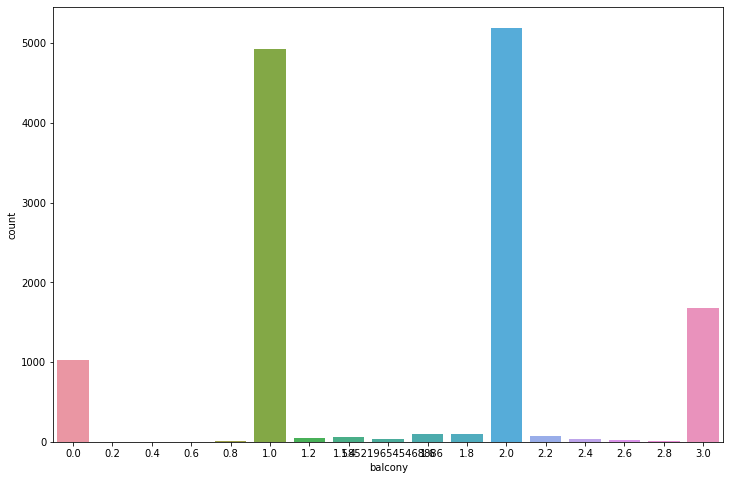

In [21]:
# Imputes Decimal values because mean of the nearest neighbor is imputed into the field with missing value
sns.countplot(x=df['balcony'])
plt.show()

In [22]:
df['balcony'].value_counts()

2.00000    5195
1.00000    4927
3.00000    1672
0.00000    1021
1.80000     104
1.60000      93
2.20000      78
1.40000      64
1.20000      45
2.40000      41
1.58522      30
2.60000      19
0.80000      11
2.80000      10
0.40000       3
0.60000       2
0.20000       2
Name: balcony, dtype: int64

### Processing KNN Imputed values in Balcony

In [23]:
df['balcony']=np.round(df['balcony'])

In [24]:
df['balcony'].value_counts()

2.0    5541
1.0    5049
3.0    1701
0.0    1026
Name: balcony, dtype: int64

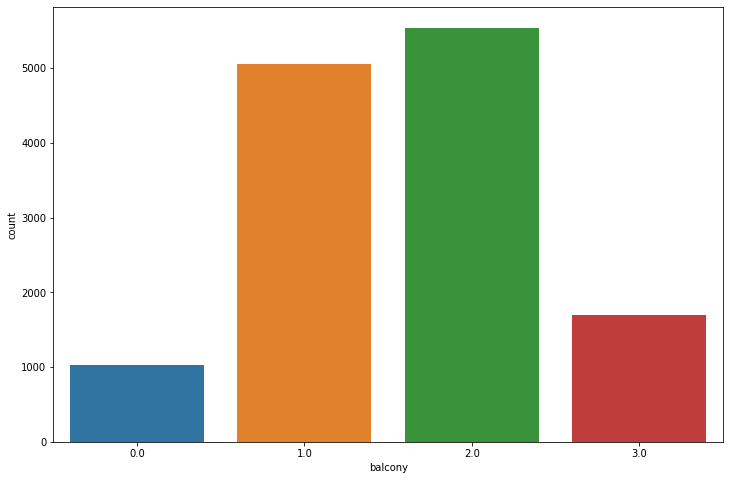

In [25]:
sns.countplot(x=df['balcony'])
plt.show()

In [26]:
df['balcony'].value_counts()

2.0    5541
1.0    5049
3.0    1701
0.0    1026
Name: balcony, dtype: int64

### Traditonal Imputing

In [27]:
## Imputing with mean ,median or mode 
print('Mean:',data['balcony'].mean())
print('Median:',data['balcony'].median())
print('Median:',data['balcony'].mode())

Mean: 1.5852196545468886
Median: 2.0
Median: 0    2.0
dtype: float64


In [28]:
data['balcony_mode_imputation']=data['balcony'].fillna(data['balcony'].median())

<AxesSubplot:xlabel='balcony_mode_imputation', ylabel='count'>

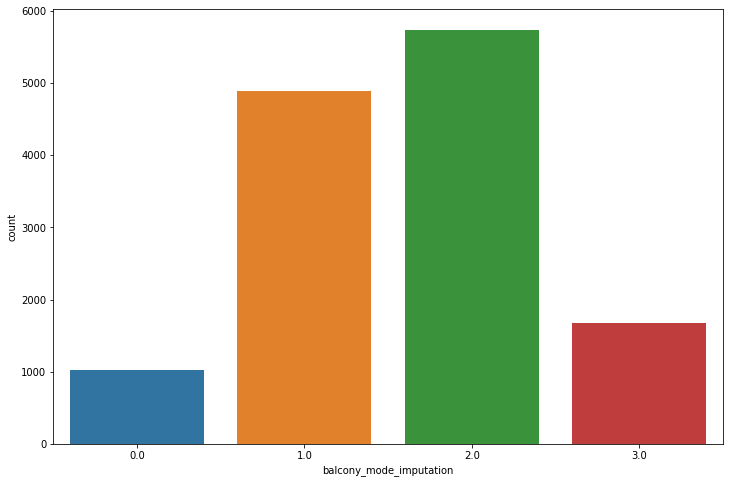

In [29]:
sns.countplot(x=data['balcony_mode_imputation'])

<a id="comp"></a>
## 5.Comparing KNN Imputer with traditional mean, median and mode imputations

In [31]:
# Data in bacony column before replacing NaN values (Initial Data)
data['balcony'].value_counts()

2.0    5103
1.0    4886
3.0    1669
0.0    1021
Name: balcony, dtype: int64

In [30]:
# Traditional method (One value spikes)
data['balcony_mode_imputation'].value_counts()

2.0    5741
1.0    4886
3.0    1669
0.0    1021
Name: balcony_mode_imputation, dtype: int64

In [32]:
#KNN Imputer 
df['balcony'].value_counts()

2.0    5541
1.0    5049
3.0    1701
0.0    1026
Name: balcony, dtype: int64

In the traditional method only one value is used to replace all the nan hence it may take one value out of proportion(May lead lead to change in distribution of data). In KNN imputer the NaN values are replaced by checking the values present in the nearest neighbours and predicting what the approximate value might be in that field. This value may or may not be accurate but is an alternative way to the traditional mean, meadian or mode imputation method.